# Project: Multiclass Classification Using KNN for Iris Dataset

## 1: Import libraries

In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import warnings

## 2: Import & Visualize data

### Import

In [26]:
data = pd.read_csv("iris.data", header = None)
data.columns = ['sepal_lenght','sepal_width','petal_length','petal_width','Category']

### Visualize

#### See raw data

In [27]:
data.head

<bound method NDFrame.head of      sepal_lenght  sepal_width  petal_length  petal_width        Category
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

#### Observe relationships 

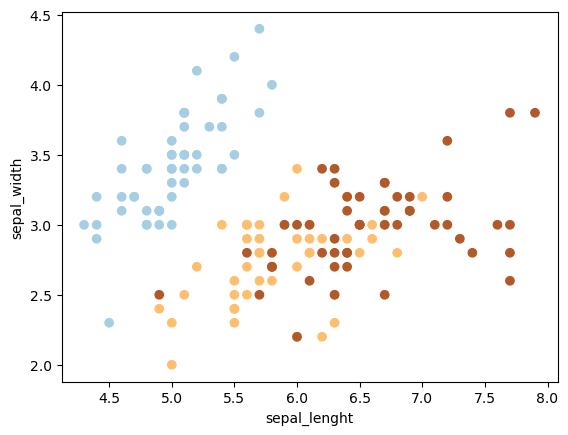

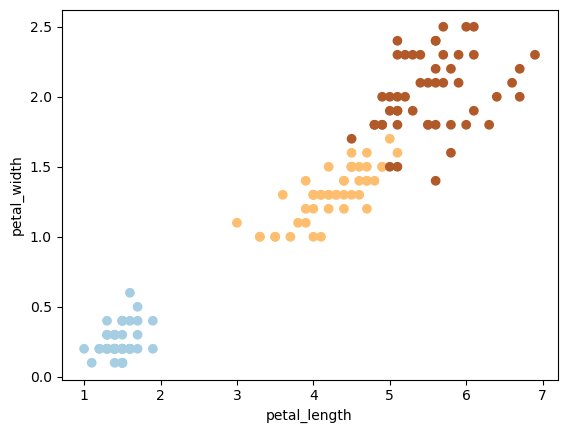

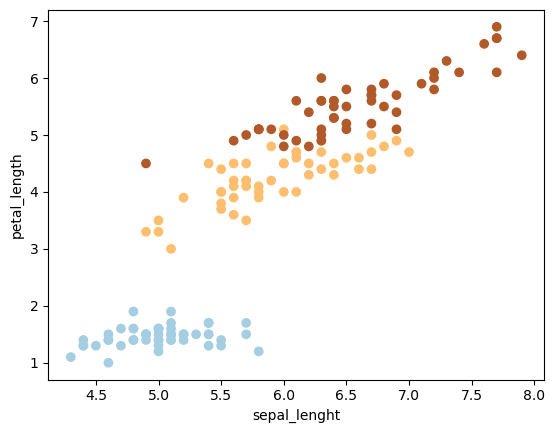

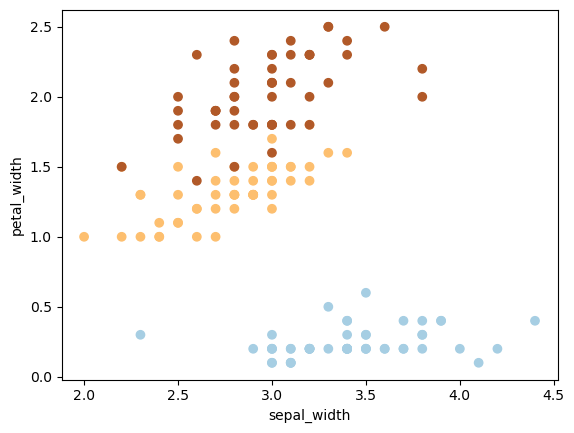

In [28]:
plt.scatter(data.loc[:,"sepal_lenght"],data.loc[:,"sepal_width"],c=data.loc[:,"Category"].astype('category').cat.codes, cmap=plt.cm.Paired)
plt.xlabel(data.columns.values[0])
plt.ylabel(data.columns.values[1])
plt.show()

plt.scatter(data.loc[:,"petal_length"],data.loc[:,"petal_width"],c=data.loc[:,"Category"].astype('category').cat.codes, cmap=plt.cm.Paired)
plt.xlabel(data.columns.values[2])
plt.ylabel(data.columns.values[3])
plt.show()

plt.scatter(data.loc[:,"sepal_lenght"],data.loc[:,"petal_length"],c=data.loc[:,"Category"].astype('category').cat.codes, cmap=plt.cm.Paired)
plt.xlabel(data.columns.values[0])
plt.ylabel(data.columns.values[2])
plt.show()

plt.scatter(data.loc[:,"sepal_width"],data.loc[:,"petal_width"],c=data.loc[:,"Category"].astype('category').cat.codes, cmap=plt.cm.Paired)
plt.xlabel(data.columns.values[1])
plt.ylabel(data.columns.values[3])
plt.show()

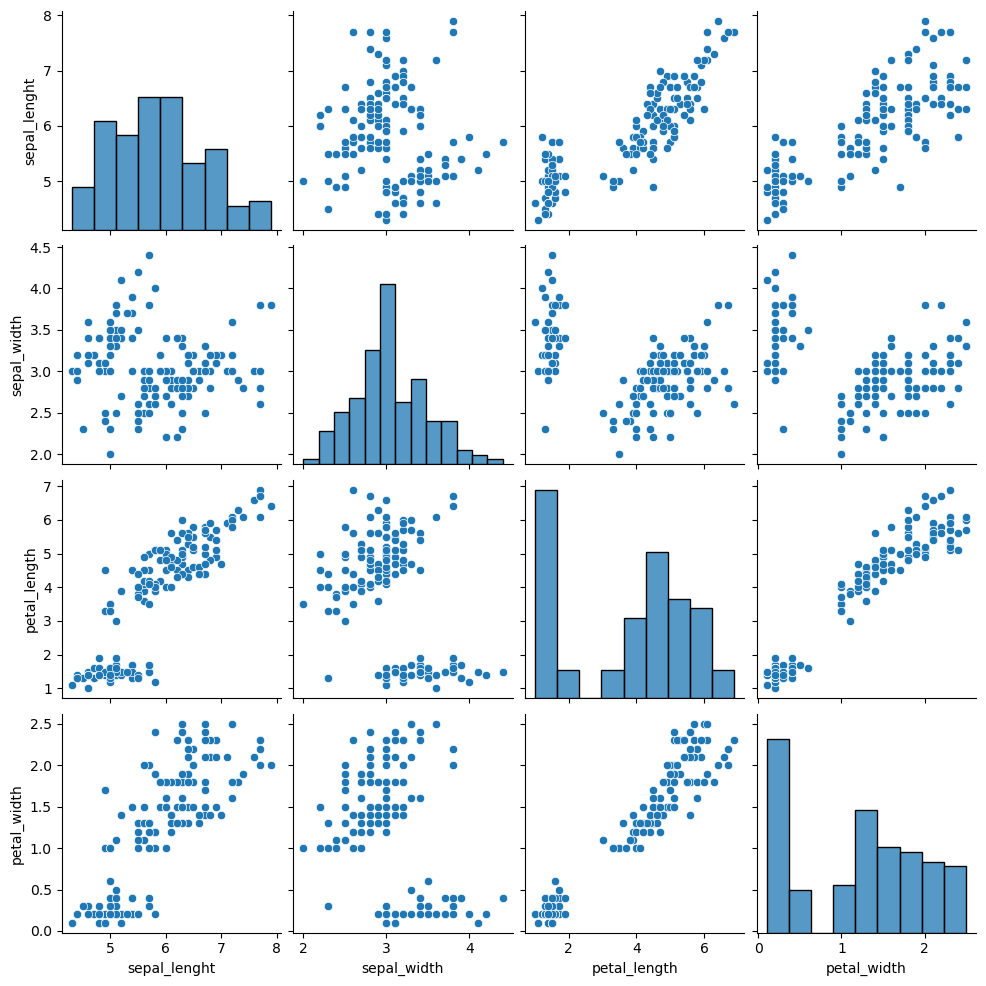

In [29]:
sns.pairplot(data)

Very clear data relationships

## 3: Data treatment

### Test / Train data split

In [30]:
#Seperating IV and DV
X = data.iloc[:,:4] # grab columns containing data
y = data['Category'] # grab column with labels
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42) #split

### Feature scaling

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4: Model creation

### Testing for optimal K

Text(0, 0.5, 'Accuracy')

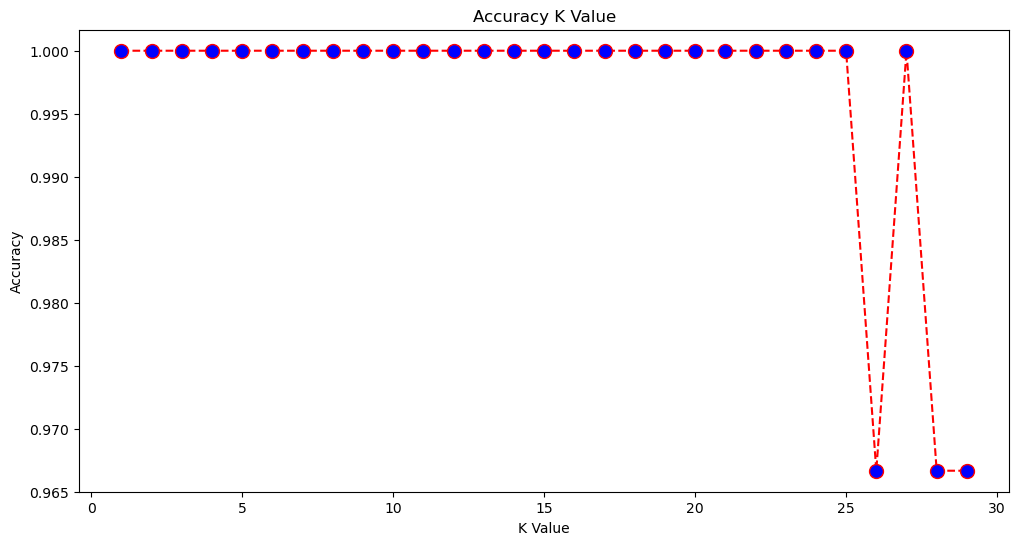

In [32]:
warnings.filterwarnings("ignore", category=FutureWarning)

k_range  = range(1,30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = metrics.accuracy_score(y_test,y_pred_knn)
    scores.append(acc_knn)

#plotting accuracy vs k-value plot
plt.figure(figsize=(12, 6))
plt.plot(k_range,scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')


The problem is _very_ simple. Any K 1-25 works. We'll use K = 3.

### Creating the model

In [33]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 5: Model evaluation

In [34]:
y_pred = model.predict(X_test)
print(f"Model accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Model accuracy: 1.0
